In [1]:
result_file = 'result.csv'
model = 'house_16H_d10_l281_n561_20240922063836'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
486,house_16H_d10_l281_n561_20240922063836,0,0.000000,house_16H,10G,1,5.812702
487,house_16H_d10_l281_n561_20240922063836,1,9.962608,house_16H,10G,1,5.254108
488,house_16H_d10_l281_n561_20240922063836,2,9.962608,house_16H,10G,1,4.902304
489,house_16H_d10_l281_n561_20240922063836,1,10.309411,house_16H,10G,1,5.100692
490,house_16H_d10_l281_n561_20240922063836,2,10.309411,house_16H,10G,1,5.675558
491,house_16H_d10_l281_n561_20240922063836,1,10.656214,house_16H,10G,1,5.292824
492,house_16H_d10_l281_n561_20240922063836,2,10.656214,house_16H,10G,1,5.363771
493,house_16H_d10_l281_n561_20240922063836,1,11.003016,house_16H,10G,1,5.426771
494,house_16H_d10_l281_n561_20240922063836,2,11.003016,house_16H,10G,1,5.129079
495,house_16H_d10_l281_n561_20240922063836,1,11.349819,house_16H,10G,1,5.033343


In [3]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 5.935258493525907)

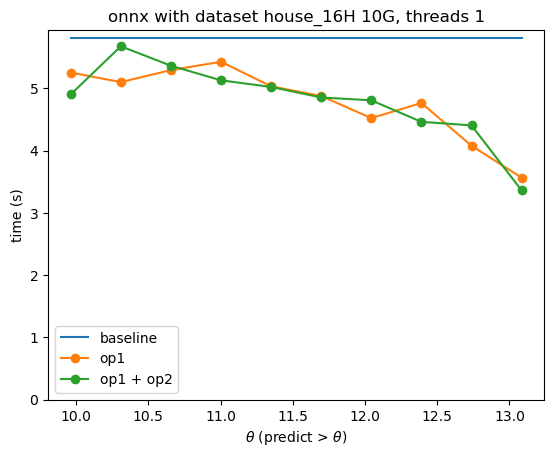

In [4]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='baseline')
plt.plot(x, y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, y2, marker='o', label='op1 + op2')
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 1.7656250780286833)

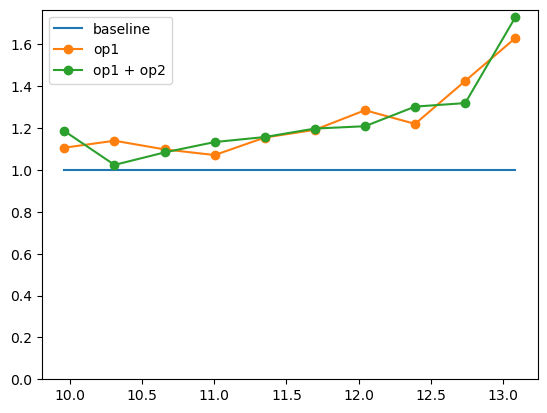

In [5]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)